In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shutil 
from tqdm import tqdm
import pydicom as pyd

In [2]:
copd = pd.read_csv("/fs5/p_masi/krishar1/COPDGENE/COPD_gene_7368subjects.csv")
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male
7365,chest,unknown,1,HMB,Yes,COPDGene_Q77837_COPDGene_Q77837,phs000179,GOLD-U_Unclassified,CT,d1977762,African American,female
7366,chest,unknown,1,HMB,Yes,COPDGene_Q77990_COPDGene_Q77990,phs000179,GOLD-U_Unclassified,CT,d1977763,African American,female


In [3]:
controls = copd.loc[copd['GOLD classification'] == 'GOLD_0_Control']
controls

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
9,chest,control,1,HMB,Yes,COPDGene_A02050_COPDGene_A02050,phs000179,GOLD_0_Control,CT,d1976718,African American,female
10,chest,control,1,HMB,Yes,COPDGene_A02098,phs000179,GOLD_0_Control,CT,d1990706,African,female
...,...,...,...,...,...,...,...,...,...,...,...,...
7358,chest,control,1,HMB,Yes,COPDGene_Q77225_COPDGene_Q77225,phs000179,GOLD_0_Control,CT,d1981234,Caucasian,male
7359,chest,control,1,HMB,Yes,COPDGene_Q77279_COPDGene_Q77279,phs000179,GOLD_0_Control,CT,d1982385,Caucasian,female
7360,chest,control,1,HMB,Yes,COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1992315,Caucasian,female
7361,chest,control,1,HMB,Yes,COPDGene_Q77306_COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1982386,Caucasian,female


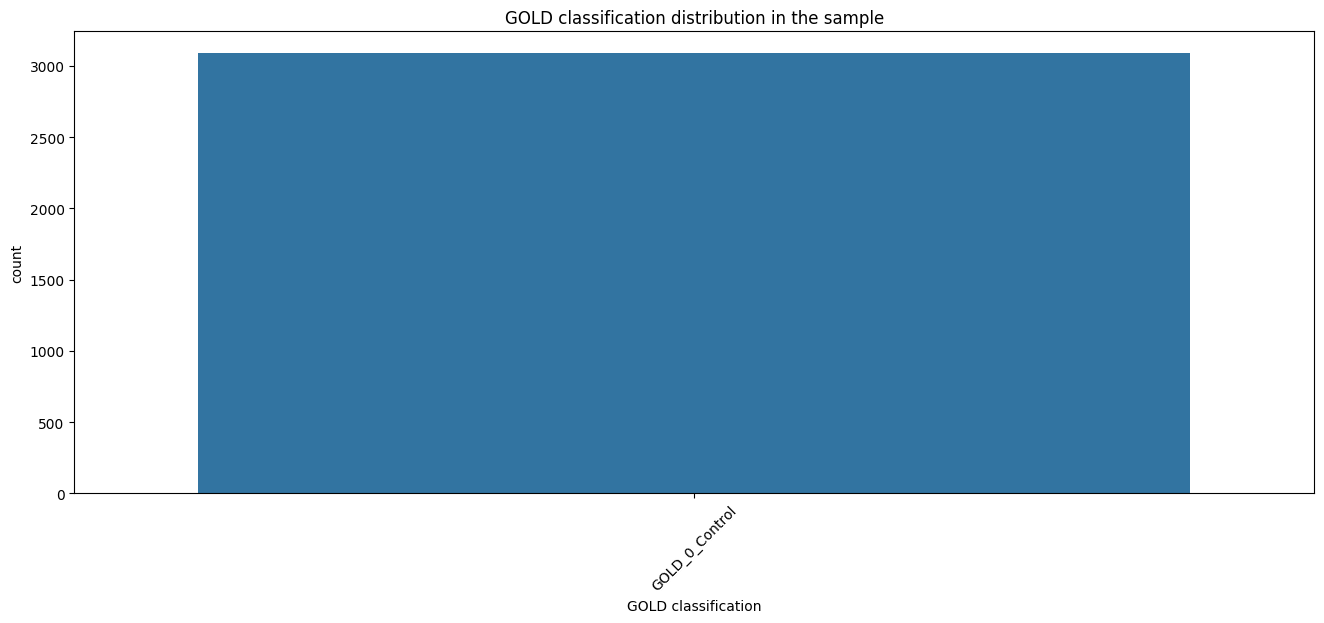

In [5]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=controls)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [7]:
#Random sample 50 controls
controls = controls.sample(n=50)
controls
controls.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/randomsample_allkernels_controls.csv", index=False)

In [10]:
def curate_copd_data_SPIE():
    copd = pd.read_csv('/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/randomsample_allkernels_controls.csv')
    file_names = copd['File Name'].to_list()
    source = '/fs5/p_masi/krishar1/COPDGENE/SPIE_2025'

    #Append all files to a list 
    dcmfilesfinal = []

    for file in tqdm(file_names):
        if file in os.listdir(source):
            dirpath = os.path.join(source, file)
            subdirs = os.listdir(dirpath)
            if len(subdirs) == 1:
                sub_sudir = subdirs[0]
                if sub_sudir == "19000101":
                    sub_sudir_path = os.path.join(dirpath, sub_sudir)
                    files = os.listdir(sub_sudir_path)
                    for subfile in files:
                        dmcfilepath = os.path.join(sub_sudir_path, subfile)
                        dcmfilesfinal.append(dmcfilepath)
                else:
                    sub_sudir_path = os.path.join(dirpath, sub_sudir)
                    dcmfilesfinal.append(sub_sudir_path)
            else:
                for subdir in subdirs:
                    sub_sudir_path = os.path.join(dirpath, subdir)
                    dcmfilesfinal.append(sub_sudir_path)

    # print(dcmfilesfinal)
                

    #Append all the files as a column in a new dataframe 
    copd_files = {'File_Path': dcmfilesfinal}
    df = pd.DataFrame(copd_files)

    df.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_SPIE_data_debug.csv", index=False)

    #Loop through all the files and extract the following meta data: Reconstruction kernel, series description, manufacturer
    for index, row in tqdm(df.iterrows()):
        dcm = pyd.dcmread(os.path.join(row['File_Path'],os.listdir(row['File_Path'])[0])) #Read the first dicom file
    
        # Check if specific DICOM tags are present
        tags = ['PatientID','ConvolutionKernel', 'SeriesDescription', 'Manufacturer']
        for tag in tags:
            if tag in dir(dcm):
                df.at[index, tag] = getattr(dcm, tag)
            else:
                df.at[index, tag] = pd.NA

    print(df)
    df.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_randomsample_SPIE_data.csv", index=False)

curate_copd_data_SPIE()

100%|██████████| 50/50 [00:00<00:00, 53.45it/s]
214it [00:27,  7.46it/s]

                                             File_Path        PatientID  \
0    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_D30399   
1    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_D30399   
2    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_D30399   
3    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_D30399   
4    /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_D30399   
..                                                 ...              ...   
209  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_C46668   
210  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_H00619   
211  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_H00619   
212  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_H00619   
213  /fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...  COPDGene_H00619   

    ConvolutionKernel           SeriesDescription Manufacturer  
0                B31f    COPDGene_

In [12]:
#Read dataframe 
df = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_randomsample_SPIE_data.csv")
df.value_counts('ConvolutionKernel')

ConvolutionKernel
B31f        49
BONE        40
STANDARD    40
B46f        27
B45f        22
B35f        16
B           10
D           10
dtype: int64

In [13]:
#Only keep the BONE and STANDARD kernels
df = df.loc[df['ConvolutionKernel'].isin(['BONE', 'STANDARD'])]
df

,File_Path,PatientID,ConvolutionKernel,SeriesDescription,Manufacturer
6,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_H40097,STANDARD,Recon 2: COPD INSPIRATION,GE MEDICAL SYSTEMS
7,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_H40097,STANDARD,Recon 2: COPD EXPIRATION,GE MEDICAL SYSTEMS
8,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_H40097,BONE,COPD EXPIRATION,GE MEDICAL SYSTEMS
9,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_H40097,BONE,COPD INSPIRATION,GE MEDICAL SYSTEMS
10,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_M48766,BONE,CHEST INSPIRATION,GE MEDICAL SYSTEMS
...,...,...,...,...,...
165,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_K80861,BONE,COPDGene_K80861_EXP_SHARP,GE MEDICAL SYSTEMS
188,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J46080,BONE,COPD INSPIRATION,GE MEDICAL SYSTEMS
189,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J46080,BONE,COPD EXPIRATION,GE MEDICAL SYSTEMS
190,/fs5/p_masi/krishar1/COPDGENE/SPIE_2025/COPDGe...,COPDGene_J46080,STANDARD,INSPIRATION,GE MEDICAL SYSTEMS


In [ ]:
import re 
df.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_randomsample_GEkernelsonly.csv", index=False)

In [ ]:
def get_inspiratory_expiratory_GEkernels():
    copd_bone_standard = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/controls_GEkernels/copdgene_controls_randomsample_GEkernelsonly.csv")
    for index, row in tqdm(copd_bone_standard.iterrows()):
        print(row['File_Path'])
        count = row['File_Path'].count('/')
        head, tail = row['File_Path'].rsplit('/', 1)
        #Check if the expression "INSP_SHARP" is in the file path
        match = re.search('(INSP_SHARP|EXP_SHARP|INSP_STD|EXP_STD|EXP-SHARP|INSP-SHARP|INSP-STD|EXP-STD)', tail)
        if match:
            copd_bone_standard.at[index, 'Inspiration_Expiration'] = match.group()
        else:
            copd_bone_standard.at[index, 'Inspiration_Expiration'] = pd.NA

    copd_bone_standard.to_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/copdgene_contorls_GEkernels_matched.csv", index=False)